# Machine Learning Project on Covid-19 Cases Prediction with Python

### In this article, I will introduce you to a machine learning project on Covid-19 cases prediction with Python for the next 30 days. These types of predictive models help in providing an accurate prediction of epidemics, which is essential for obtaining information on the likely spread and consequences of infectious diseases.

### Governments and other legislative bodies rely on these kinds of machine learning predictive models and ideas to suggest new policies and assess the effectiveness of applied policies.

I will start the task of Covid-19 cases prediction with Python for the next 30 days by importing the necessary Python libraries and the dataset:

In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.11
    Uninstalling kagglehub-0.3.11:
      Successfully uninstalled kagglehub-0.3.11


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antgoldbloom/covid19-data-from-john-hopkins-university")

print("Path to dataset files:", path)

100%|██████████| 10.6M/10.6M [00:00<00:00, 80.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/antgoldbloom/covid19-data-from-john-hopkins-university/versions/931


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df0 = pd.read_csv("/root/.cache/kagglehub/datasets/antgoldbloom/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("/root/.cache/kagglehub/datasets/antgoldbloom/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_deaths.csv")

In [ ]:
df0

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,3/12/21,42.0,681.0,157.0,69.0,60.0,63.0,7849.0,818.0,0.0,...,6609.0,1357.0,0.0,0.0,509.0,17.0,1983.0,62.0,327.0,46.0
416,3/13/21,0.0,698.0,135.0,29.0,58.0,17.0,6278.0,795.0,0.0,...,5534.0,1059.0,89.0,0.0,593.0,3.0,1784.0,42.0,234.0,48.0
417,3/14/21,26.0,653.0,122.0,38.0,57.0,1.0,3697.0,486.0,0.0,...,4618.0,1558.0,86.0,0.0,0.0,1.0,1868.0,65.0,323.0,13.0
418,3/15/21,0.0,543.0,145.0,23.0,27.0,0.0,6164.0,317.0,0.0,...,5089.0,1171.0,111.0,0.0,1109.0,3.0,2298.0,72.0,153.0,20.0


In [ ]:
df1

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
print(df0.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 290 entries, Country/Region to Zimbabwe
dtypes: float64(198), object(92)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 290 entries, Country/Region to Zimbabwe
dtypes: float64(198), object(92)
memory usage: 2.5+ MB
None


In [ ]:
print(df0.describe())
print(df1.describe())

       Afghanistan      Albania      Algeria      Andorra       Angola  \
count  1142.000000  1142.000000  1142.000000  1142.000000  1142.000000   
mean    183.407180   292.869527   237.737303    41.935201    92.196147   
std     329.000795   442.784181   333.472589   136.716917   238.652171   
min     -48.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.250000    15.000000     9.000000     0.000000     0.000000   
50%      71.000000    89.000000   134.000000     0.000000    21.000000   
75%     185.750000   460.500000   301.250000    35.000000   101.000000   
max    3243.000000  4789.000000  2521.000000  2313.000000  5035.000000   

        Antarctica  Antigua and Barbuda      Argentina      Armenia  \
count  1142.000000          1142.000000    1142.000000  1142.000000   
mean      0.009632             7.973730    8795.934326   391.688266   
std       0.325506            31.987142   17215.543701   606.280740   
min       0.000000            -1.000000       0.0

# Data Preparation
Now the next step is data preparation, I will simply prepare new data by combining the above datasets and then we will visualize a geographical plot of the data to see what we are going to work with:

In [ ]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent=pd.read_csv("/content/continents2.csv")
continent["name"]=continent["name"].str.upper()
continent["name"]

,name
0,AFGHANISTAN
1,ÅLAND ISLANDS
2,ALBANIA
3,ALGERIA
4,AMERICAN SAMOA
...,...
244,WALLIS AND FUTUNA
245,WESTERN SAHARA
246,YEMEN
247,ZAMBIA


# Data Visualization
Now here I will prepare three visualizations. One will be a geographical visualization to visualize the worldwide spread of Covid-19. Then the next visualization will be to have a look at the daily cases of Covid-19 in the world. Then the last visualization will be to have a look at the daily death cases of Covid-19 in the world.

Now let’s start data visualization by looking at the worldwide spread of Covid-19:

In [ ]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES"
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Now let’s have a look at the daily cases all around the world:

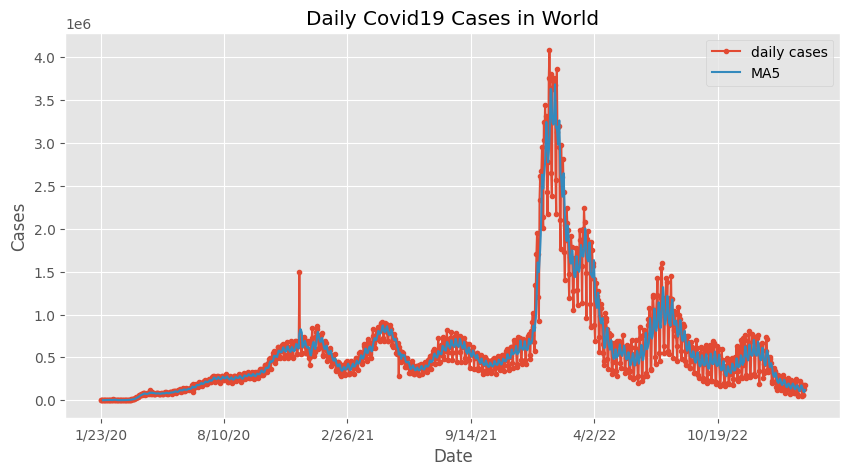

In [ ]:

count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

Now let’s have a look at the daily death cases of Covid-19:

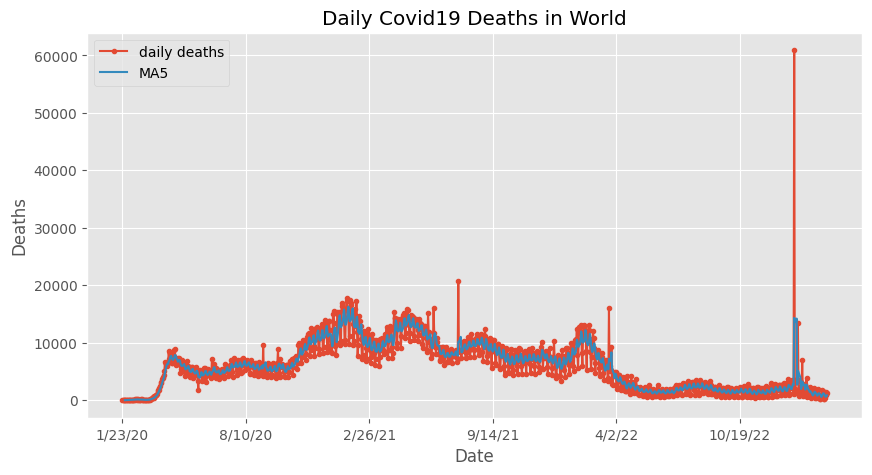

In [ ]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# Covid-19 Cases Prediction with Python for Next 30 Days
Now, I will use the Facebook prophet model for the task of Covid-19 cases prediction with Python for the next 30 days. Facebook prophet model uses time series method for forecasting.

Let’s see how we can use the Facebook prophet model for Covid-19 cases prediction with Python for the next 30 days:

<ipython-input-16-246484b0ddbf>:22: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdy0eegen/zs4jnf3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdy0eegen/_7sb6ic0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54784', 'data', 'file=/tmp/tmpdy0eegen/zs4jnf3x.json', 'init=/tmp/tmpdy0eegen/_7sb6ic0.json', 'output', 'file=/tmp/tmpdy0eegen/prophet_modeldnb_xqyv/prophet_model-20250428112406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:24:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


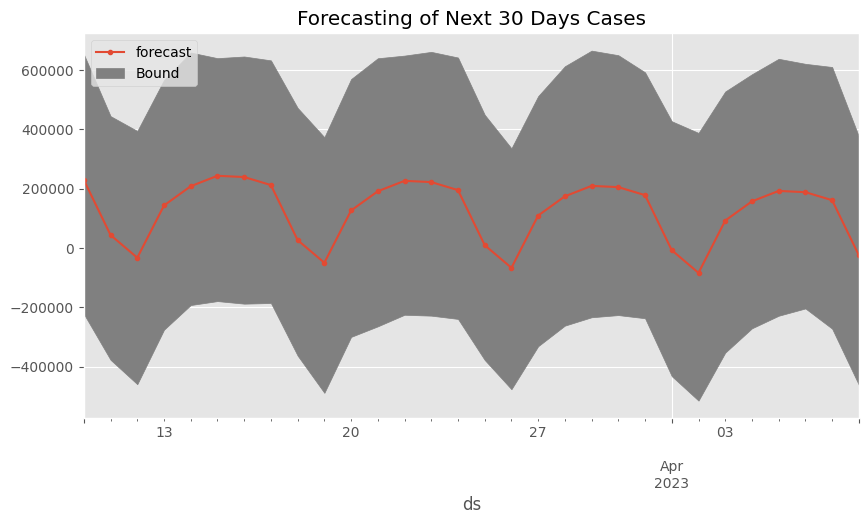

In [ ]:

class Fbprophet(object):
    def fit(self,data):

        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)

    def forecast(self,periods,freq):

        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)

    def plot(self,xlabel="Years",ylabel="Values"):

        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))

    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()